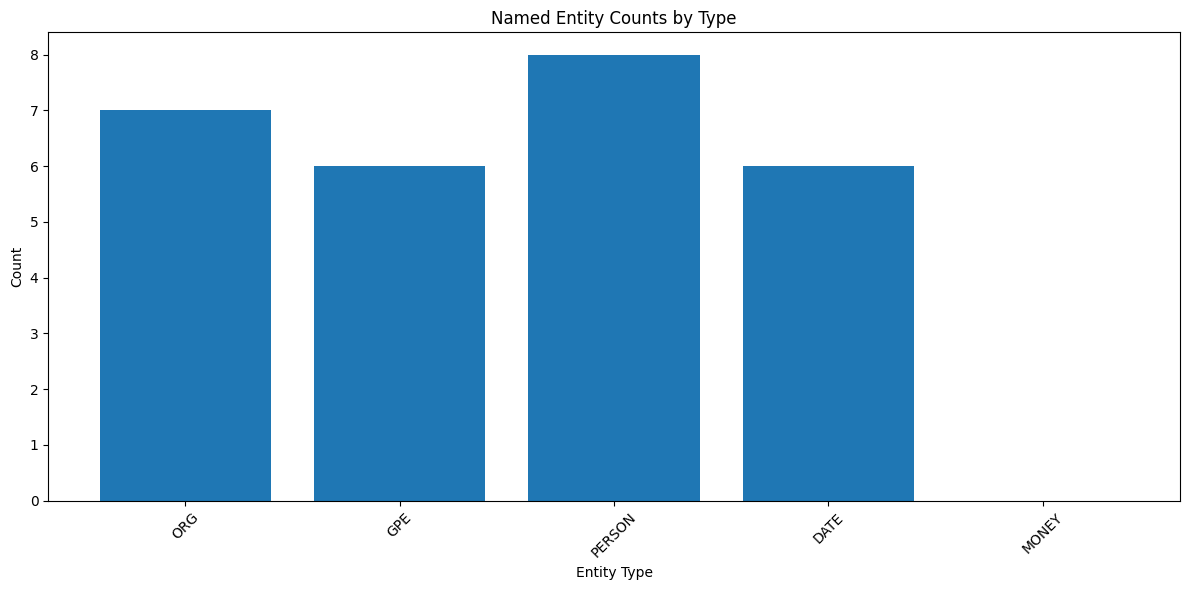


Article Statistics:
Total Words: 506
Average Word Length: 4.72
Entity Density: 0.053
Sentiment Polarity: 0.110
Sentiment Subjectivity: 0.411

Unique Entities Found:

ORG:
CBS News, NYPD Aviation Unit, NYPD

GPE:
New York, Manchester, New York City, Germany, England

PERSON:
Salvatore DiPace, DiPace, Sergeant Antonio Hernandez, Angela Merkel, Ms Merkel, Dipace

DATE:
this summer, last year, just over a week ago, the last year


In [ ]:
import pandas as pd
import numpy as np
import spacy
import re
from bs4 import BeautifulSoup
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

class NewsAnalyzer:
    def __init__(self):
        self.nlp = spacy.load('en_core_web_sm')

    def preprocess_text(self, text):
        """Clean and preprocess text data"""
        # Remove special characters and extra whitespace
        text = re.sub(r'[^\w\s.,]', ' ', text)
        text = re.sub(r'\s+', ' ', text)
        return text.strip()

    def extract_entities(self, text):
        """Extract and analyze named entities from text"""
        doc = self.nlp(text)

        # Count entities by type
        entity_counts = {
            'ORG': 0,
            'GPE': 0,
            'PERSON': 0,
            'DATE': 0,
            'MONEY': 0
        }

        # Store actual entities for analysis
        entity_details = {
            'ORG': [],
            'GPE': [],
            'PERSON': [],
            'DATE': [],
            'MONEY': []
        }

        for ent in doc.ents:
            if ent.label_ in entity_counts:
                entity_counts[ent.label_] += 1
                entity_details[ent.label_].append(ent.text)

        return entity_counts, entity_details

    def calculate_sentiment(self, text):
        """Calculate sentiment scores using TextBlob"""
        blob = TextBlob(text)
        return {
            'polarity': blob.sentiment.polarity,
            'subjectivity': blob.sentiment.subjectivity
        }

    def analyze_article(self, text):
        """Perform comprehensive analysis of the article"""
        # Preprocess text
        clean_text = self.preprocess_text(text)

        # Basic text features
        features = {
            'article_length': len(clean_text.split()),
            'avg_word_length': np.mean([len(word) for word in clean_text.split()])
        }

        # Extract entities
        entity_counts, entity_details = self.extract_entities(text)
        features.update(entity_counts)

        # Add sentiment scores
        features.update(self.calculate_sentiment(clean_text))

        # Calculate entity density
        features['entity_density'] = sum(
            count for entity, count in entity_counts.items()
        ) / features['article_length']

        return features, entity_details

    def visualize_analysis(self, features, entity_details):
        """Create comprehensive visualizations of the analysis"""
        # 1. Entity Count Bar Plot
        plt.figure(figsize=(12, 6))
        entity_types = ['ORG', 'GPE', 'PERSON', 'DATE', 'MONEY']
        entity_counts = [features[et] for et in entity_types]
        plt.bar(entity_types, entity_counts)
        plt.title('Named Entity Counts by Type')
        plt.xlabel('Entity Type')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        # 2. Feature Summary
        print("\nArticle Statistics:")
        print(f"Total Words: {features['article_length']}")
        print(f"Average Word Length: {features['avg_word_length']:.2f}")
        print(f"Entity Density: {features['entity_density']:.3f}")
        print(f"Sentiment Polarity: {features['polarity']:.3f}")
        print(f"Sentiment Subjectivity: {features['subjectivity']:.3f}")

        # 3. Print unique entities found
        print("\nUnique Entities Found:")
        for entity_type, entities in entity_details.items():
            if entities:
                unique_entities = list(set(entities))
                print(f"\n{entity_type}:")
                print(", ".join(unique_entities))

# Execute analysis on the provided article
article_text = """New York police are concerned drones
                  could become tools for terrorists, and are investigating ways to stop potential attacks.
                  Until now police haven't acknowledged drones as a potential weapon, but the NYPD
                  has now said the technology has advanced enough that someone could use them to carry out an
                  air assault using chemical weapons and firearms. Police want to develop technology which will
                  allow them to take control of drones as well as scan the skies for them before major events.
                  The NYPD says drones carrying explosives are the number one threat as they investigate ways to stop attacks .
                  Deputy Chief Salvatore DiPace, left, was concerned about an incident last year where a drone was landed in front of
                  German Chancellor Angela Merkel and 'could have took the chancellor and her people out' A drone which was flown over a
                  packed football stadium in Manchester, England, just over a week ago, resulting in the suspected pilot being arrested .
                  They are consulting with the military and members of its counterterrorism, bomb squad, emergency services and aviation
                  units are working on a plan to counter weaponized drones. The NYPD hasn't received any intelligence indicating there is
                  an imminent threat, but has become increasingly concerned over the last year. Deputy Chief Salvatore DiPace told CBS News:
                  'We've looked at some people that have jury-rigged these drones to carry guns, to carry different types of explosives if they wanted to;
                  there's just so many possibilities that we're very worried about.' Mr Dipace said police had also seen video showing how accurate an attack from a drone could be:
                  'We've seen some video where the drone was flying at different targets along the route and very accurately hitting the targets with the paintball.
                  The NYPD now sees a drone carrying explosives as the number one threat.
                  Mr DiPace's concerns follow an incident in Germany last year where a drone was able to land just in front of German Chancellor Angela Merkel as she delivered a speech.
                  The drone, circled, landed in front of Ms Merkel as she delivered a speech sin Germany sparking fears that the device could easily be used to commit a terrorist act .
                  He said: 'If you really think about what could have happened there, the drone hit its target right on the mark and could have took the chancellor and her people out.'
                  There has been a dramatic increase of incidents involving drones in New York City in the last year, with 40 recorded. In some cases unmanned aircraft systems or drones
                  had flown into airspace being used by NYPD helicopters. In one incident this summer, a drone which was almost 800 feet off the ground, nearly collided with a police helicopter.
                  NYPD Aviation Unit Member, Sergeant Antonio Hernandez said: 'We're flying in the dark; we have night-vision goggles on, we're trying to get a job
                  done and then the next thing you know we see this drone come up to our altitude.'"""

# Create analyzer instance and analyze article
analyzer = NewsAnalyzer()
features, entity_details = analyzer.analyze_article(article_text)

# Generate visualizations and analysis
analyzer.visualize_analysis(features, entity_details)